## NAMA : A. Fuad Ahsan Basir
## NIM : H071201076
## Kelas : Machine Learning

# Pre Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes-dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


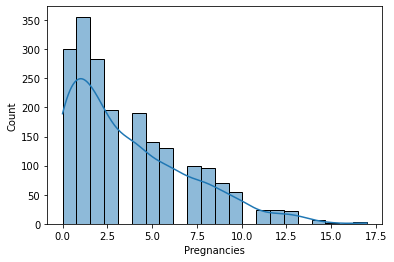

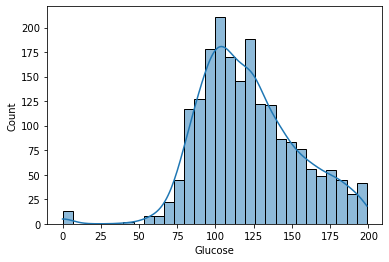

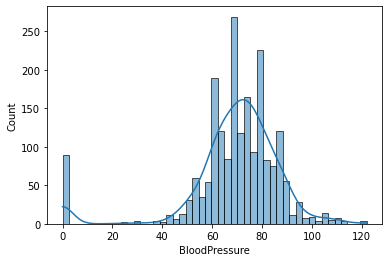

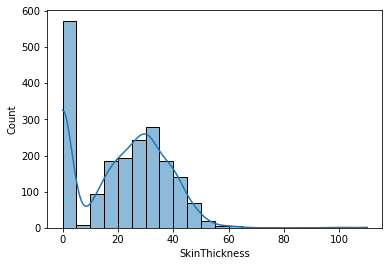

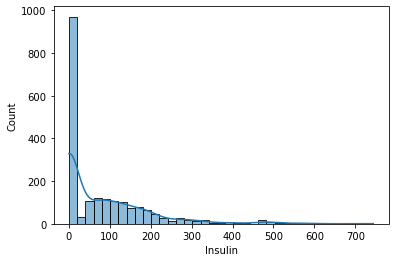

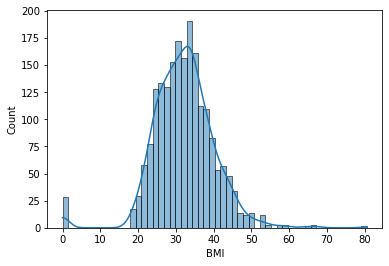

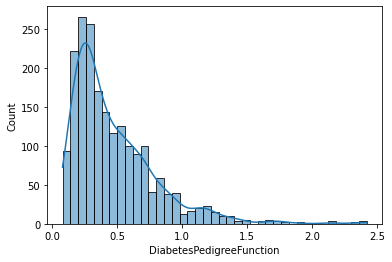

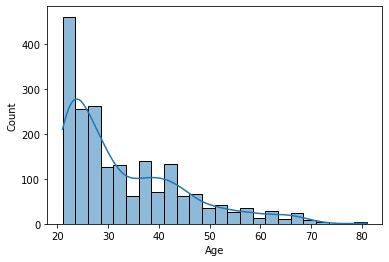

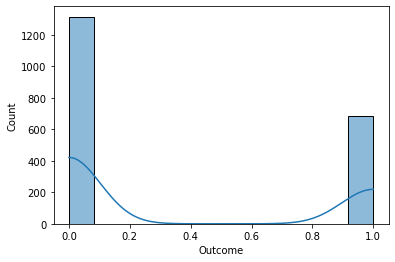

In [4]:
for col in df.columns:
    plt.figure()
    sns.histplot(data=df, x=col, kde=True)

## Missing Value

In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.isin({0}).sum()

Pregnancies                  301
Glucose                       13
BloodPressure                 90
SkinThickness                573
Insulin                      956
BMI                           28
DiabetesPedigreeFunction       0
Age                            0
Outcome                     1316
dtype: int64

In [7]:
for col in ['BMI', 'Glucose', 'BloodPressure']:
  df[col] = df[col].replace({0 : df[col].median()})

for col in ['Insulin', 'SkinThickness']:
  df[col] = df[col].replace({0 : df[col].mean()})

In [8]:
df.isin({0}).sum()

Pregnancies                  301
Glucose                        0
BloodPressure                  0
SkinThickness                  0
Insulin                        0
BMI                            0
DiabetesPedigreeFunction       0
Age                            0
Outcome                     1316
dtype: int64

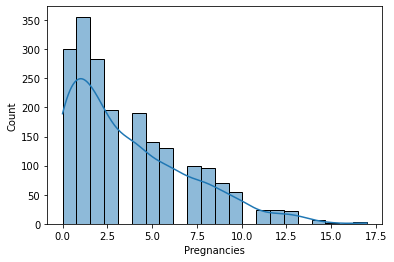

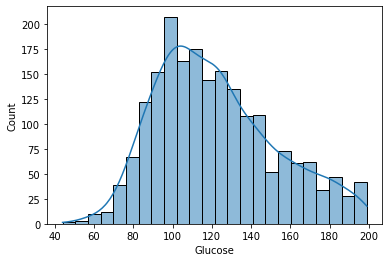

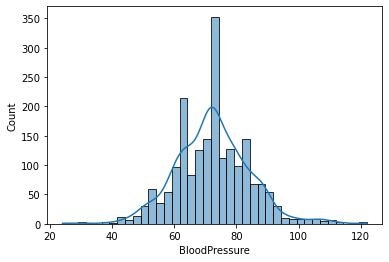

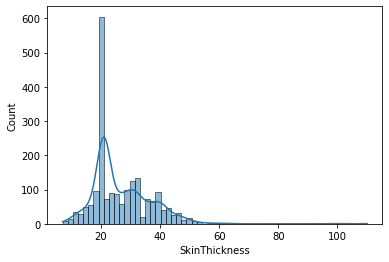

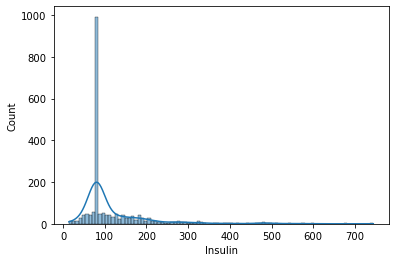

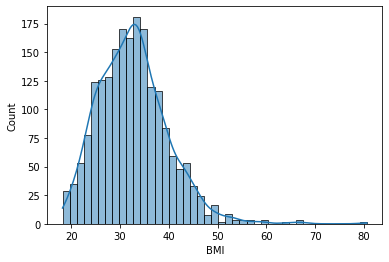

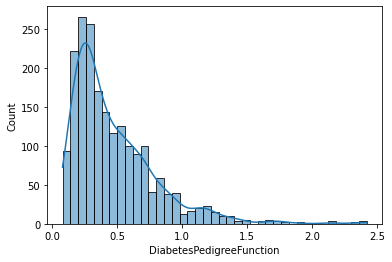

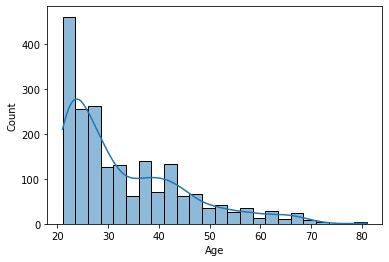

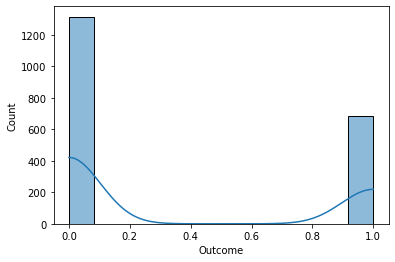

In [9]:
for col in df.columns:
    plt.figure()
    sns.histplot(data=df, x=col, kde=True)

In [10]:
df.isin({0}).sum()

Pregnancies                  301
Glucose                        0
BloodPressure                  0
SkinThickness                  0
Insulin                        0
BMI                            0
DiabetesPedigreeFunction       0
Age                            0
Outcome                     1316
dtype: int64

In [11]:
df.shape

(2000, 9)

## Outliers

In [12]:
x = df.drop(['Outcome'], axis=1)

In [13]:
for i in x.columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    min_IQR = Q1 - 1.5 * IQR
    max_IQR = Q3 + 1.5 * IQR
    df =  df[(df[i]>min_IQR) & (df[i]<max_IQR)]

In [14]:
df.shape

(1553, 9)

# Train Model

In [15]:
x=df.drop(['Outcome'], axis=1)
y=df['Outcome']

In [16]:
from sklearn import preprocessing
x_normal = preprocessing.normalize(x)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_normal, y, test_size=0.25, random_state=76)

## Cat Boost

In [18]:
from catboost import CatBoostClassifier

ctb = CatBoostClassifier(verbose=0)

ctb.fit(X_train, y_train)
ctb.score(X_test, y_test)

0.9434447300771208

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


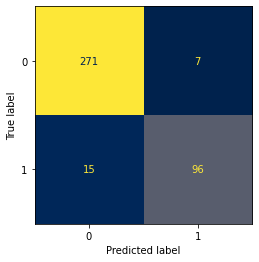

In [19]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(ctb,X_test,y_test,cmap='cividis',colorbar=False)

## Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier 

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9768637532133676

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


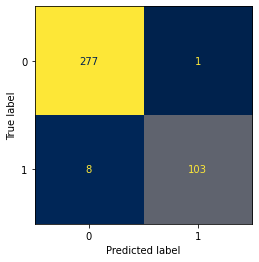

In [21]:
disp = plot_confusion_matrix(rfc,X_test,y_test,cmap='cividis',colorbar=False)